In [1]:
import json
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [27]:
tp='cle_radius.csv'
all_data=pd.read_csv(tp)
df=all_data.drop(['identifier/fips', 'identifier/apn', 'identifier/apnOrig', 'vintage/lastModified', 'vintage/pubDate', 'summary/propIndicator', 'summary/proptype','location/geoid', 'identifier/attomId', 'sale/amount/salecode', 'sale/amount/saledisclosuretype', 'address/line1', 'address/line2', 'address/matchCode', 'address/countrySubd', 'address/postal2', 'address/postal3', 'location/accuracy', 'address/country', 'sale/amount/saledocnum', 'summary/propLandUse', 'sale/salesearchdate', 'sale/saleTransDate', 'location/elevation' ], axis=1)
df.dtypes
df2=df.merge(income2, how='inner', on= 'address/postal1')
df2

,identifier/obPropId,LotSizeAcres,address/locality,address/oneLine,address/postal1,location/latitude,location/longitude,location/distance,summary/propclass,summary/propsubtype,summary/yearbuilt,building/size/universalsize,building/rooms/bathstotal,building/rooms/beds,sale/amount/saleamt,sale/amount/salerecdate,sale/amount/saletranstype,sale/calculation/priceperbed,sale/calculation/pricepersizeunit,median_income
0,2.172470e+13,8.2130,Apple Creek,"11024 DOVER RD, APPLE CREEK, OH 44606",44606,40.724398,-81.784024,49.55,Agricultural,RESIDENTIAL,1854,2698,2.0,3,65000,2006-10-05,Resale,10833,16,56906
1,1.827130e+13,1.6500,Apple Creek,"7651 BUSS RD # A, APPLE CREEK, OH 44606",44606,40.726153,-81.836130,49.32,Single Family Residence / Townhouse,RESIDENTIAL,1965,5550,3.0,9,200000,2010-04-23,Resale,22222,36,56906
2,2.428500e+13,17.1880,Apple Creek,"LINCOLN WAY E, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,48.95,Vacant,RESIDENTIAL,0,0,0.0,0,650000,2017-06-20,Resale,0,0,56906
3,2.428510e+13,22.3100,Apple Creek,"CHIPPEWA RD, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,48.95,Exempt,RESIDENTIAL,0,0,0.0,0,142800,2016-08-04,Resale,0,0,56906
4,1.827220e+13,25.9750,Apple Creek,"3610 FREDERICKSBURG RD, APPLE CREEK, OH 44606",44606,40.732470,-81.799850,48.95,Exempt,RESIDENTIAL,0,0,0.0,0,250000,2015-10-30,Resale,0,0,56906
5,3.701350e+12,0.5700,Apple Creek,"12733 EMERSON RD, APPLE CREEK, OH 44606",44606,40.741033,-81.760147,48.51,Single Family Residence / Townhouse,RESIDENTIAL,1949,1310,1.0,3,130000,2017-11-27,Resale,43333,99,56906
6,1.819840e+13,2.0000,Apple Creek,"4353 S HONEYTOWN RD, APPLE CREEK, OH 44606",44606,40.744233,-81.876709,48.08,Single Family Residence / Townhouse,RESIDENTIAL,1972,1884,4.0,3,175000,2015-05-20,Resale,58333,93,56906
7,1.827180e+13,0.3246,Apple Creek,"114 SPRING RUN DR, APPLE CREEK, OH 44606",44606,40.743184,-81.826779,48.15,Single Family Residence / Townhouse,RESIDENTIAL,1991,1232,2.0,3,164000,2017-10-27,Resale,54667,133,56906
8,1.821150e+13,0.4890,Apple Creek,"208 MILL ST, APPLE CREEK, OH 44606",44606,40.749435,-81.831509,47.71,Single Family Residence / Townhouse,RESIDENTIAL,1972,2324,3.0,3,150000,2017-09-20,Resale,50000,65,56906
9,3.694920e+12,0.3719,Apple Creek,"732 W MAIN ST, APPLE CREEK, OH 44606",44606,40.755597,-81.845627,47.28,Single Family Residence / Townhouse,RESIDENTIAL,2006,1296,2.0,3,23500,2005-11-17,Construction Loan/Financing,7833,18,56906


Text(0.5, 1.0, 'Distribution of households')

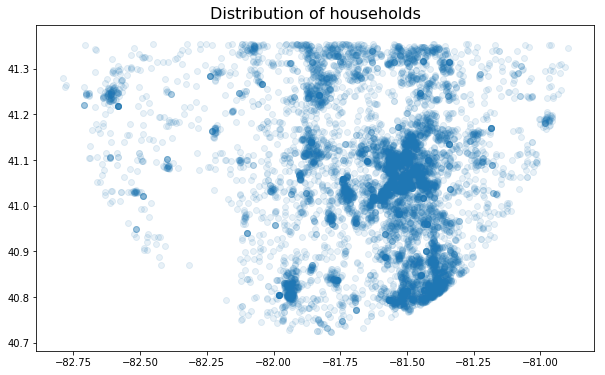

In [28]:

plt.figure(figsize=(10,6))
plt.scatter(df2['location/longitude'],y=df2['location/latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

In [29]:
house=pd.read_csv('house.csv', dtype={'name': int, 'med/housing':int })
house1=house.drop(['geoid', 'B25077001, Error'], axis=1)
house2=house1.rename(columns={'name': 'address/postal1'})
houses=house2.iloc[1:]
houses2=houses.loc[houses["med/housing"] > 1, :]


In [30]:
dem=pd.read_csv('demo.csv', dtype={'1':float, 'total':int, 'address/postal1':int, '2':int, '3':int, '4':int})
dem2=dem.iloc[1:]
dem3=dem2.loc[:, ["address/postal1", "total", "1", "2", "3", "4"]]
dem3['1per']=(dem3['1']/dem3['total'])*100
dem3['2per']=(dem3['2']/dem3['total'])*100
dem3['4per']=(dem3['4']/dem3['total'])*100


In [31]:
pop=pd.read_csv('pop.csv', dtype={'population':float, 'address/postal1':int})
pop2=pop.iloc[1:]
pop3=pop2.loc[:, ["address/postal1", "population" ]]


In [32]:
edu=pd.read_csv('education.csv', dtype={'total':float, 'address/postal1':int, 'Bachelors':int, 'Masters':int, 'HighSchool':int, 'Associates':int, 'Professional':int, 'Doctorate':int})
edu2=edu.iloc[1:]
edu3=edu2.loc[:, ["address/postal1", "total", "Bachelors", "Masters", "HighSchool", "Associates", "Professional", "Doctorate"]]
edu3['bachper']=(edu3['Bachelors']/edu3['total'])*100
edu3['docper']=(edu3['Doctorate']/edu3['total'])*100
edu3['mastper']=(edu3['Masters']/edu3['total'])*100
edu3['HSper']=(edu3['HighSchool']/edu3['total'])*100

In [33]:


age=pd.read_csv('age.csv', dtype={'total':float, 'address/postal1':int})
age2=age.iloc[1:]
age3=age2.drop(['geoid', 'B01002000.5', 'B01002000.5, Error', 'B01002001, Error', 'male', 'female', 'B01002002, Error', 'B01002003, Error'], axis=1)


In [9]:
merge1=dem3.merge(pop3, how='inner', on='address/postal1' )
merge2=merge1.merge(edu3, how='outer', on='address/postal1')
merge3=merge2.merge(age3, how='inner', on='address/postal1')
merge3.head()

,address/postal1,total_x,1,2,3,4,1per,2per,4per,population,...,Masters,HighSchool,Associates,Professional,Doctorate,bachper,docper,mastper,HSper,total
0,16159,4824,4703.0,11,0,13,97.491708,0.228027,0.269486,4824.0,...,237,1571,316,0,0,13.741110,0.000000,6.742532,44.694168,47.3
1,43001,2890,2782.0,0,0,0,96.262976,0.000000,0.000000,2890.0,...,162,659,134,28,8,21.461657,0.411734,8.337622,33.916624,39.3
2,43002,3238,3020.0,98,0,97,93.267449,3.026560,2.995676,3238.0,...,298,221,431,109,11,41.672426,0.380097,10.297167,7.636489,32.7
3,43003,2895,2836.0,0,0,2,97.962003,0.000000,0.069085,2895.0,...,72,835,165,8,9,13.473787,0.440960,3.527683,40.911318,41.3
4,43004,25768,17174.0,6538,0,1092,66.648556,25.372555,4.237814,25768.0,...,1765,2887,1355,409,171,30.537597,0.995981,10.280156,16.815190,34.9


In [10]:
food_stamp=pd.read_csv('fs.csv', dtype={'PA/FS': int, 'NO_PA/FS':int, 'address/postal1':int})
fs=food_stamp.drop(['geoid', 'B19058001, Error', 'B19058002, Error', 'B19058003, Error'], axis=1)
fs['perc_fs']=(fs['PA/FS']/fs['B19058001'])*100
fs1=fs.drop(['B19058001'], axis=1)
fs2=fs1.iloc[1:]


In [11]:
med_inc2=pd.read_csv('medianincome.csv', dtype={'zipcode': int, 'median':int})
med_inc=med_inc2.rename(columns={'zipcode': 'address/postal1', 'median': 'median_income'})
income=med_inc.drop(['geoid', 'B19013001, Error'], axis=1)
income2 = income.iloc[1:]


In [12]:
df_res= df.loc[df["summary/propclass"] == "Single Family Residence / Townhouse", :]
b=df_res['address/postal1'].unique()
dataframe2=pd.DataFrame(b, columns=['zip'])


In [13]:
e=df_res['address/locality'].unique()
dataframe=pd.DataFrame(e, columns=['a'])
dataframe.to_csv("crime2.csv")

In [14]:
df_r=pd.read_csv('desc_df2.csv')


In [15]:
df_r['identifier/obPropId'].astype(str)
ids=df_r['identifier/obPropId'].tolist()


In [16]:
desc_df = df_res.sort_values("sale/amount/salerecdate", ascending=False)
desc_df2=desc_df.iloc[0:1000, :]
#desc_df2.to_csv('desc_df.csv')

In [17]:
desc_df3=desc_df2.loc[desc_df2["summary/yearbuilt"] > 1, :]

In [18]:
desc_df4=desc_df3.loc[desc_df3["sale/amount/saleamt"] > 5000, :]

In [21]:
desc_df5=desc_df4.loc[desc_df4['building/rooms/bathstotal'] > 0, :]

In [22]:
desc_df6=desc_df5.merge(income2, how='inner', on= 'address/postal1')

In [23]:
desc_df7=desc_df6.loc[desc_df6["median_income"] > 1, :]

In [24]:
desc_df8=desc_df7.loc[desc_df7["sale/amount/saleamt"] < 2000000, :]

In [25]:
desc_df9=desc_df8.merge(fs2, how='inner', on='address/postal1')


In [26]:
desc_df10=desc_df9.merge(houses2, how='inner', on='address/postal1')

In [34]:
desc_df11=desc_df10.merge(merge3, how='inner', on='address/postal1')

In [35]:
desc_df12=desc_df11.loc[desc_df11["population"] > 1, :]

In [36]:
desc_df13=desc_df12.loc[desc_df11["location/distance"] < 40, :]

In [37]:
desc_df14=desc_df13.loc[desc_df11["LotSizeAcres"] > 0.0000, :]

In [38]:
ML_df=desc_df14.loc[:, ["LotSizeAcres", "med/housing", "median_income", "2per", "1per", "4per", "Masters", "HSper", "bachper", "total", "population", "perc_fs", "location/distance", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds", "sale/amount/saleamt"]]
ML_df.to_csv('ML.csv')
ML_df['difference_house']=ML_df['sale/amount/saleamt']-ML_df['med/housing']
ML_df['year_b2']=2019-ML_df['summary/yearbuilt']
ML_df.describe()

,LotSizeAcres,med/housing,median_income,2per,1per,4per,Masters,HSper,bachper,total,population,perc_fs,location/distance,summary/yearbuilt,building/rooms/bathstotal,building/rooms/beds,sale/amount/saleamt,difference_house,year_b2
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,6.660000e+02,6.660000e+02,666.000000
mean,0.614689,138235.435435,57102.692192,12.661542,81.419254,2.576672,1249.328829,29.840435,18.243307,40.900300,24436.566066,14.895134,27.890961,1957.698198,1.951952,3.118619,1.533493e+05,1.511391e+04,61.301802
std,1.307810,58739.743097,20535.140235,17.056648,19.006062,4.122916,1041.720934,7.371030,8.361280,4.785178,13074.330403,11.259301,7.800931,31.526486,0.985963,0.731287,1.366397e+05,1.126391e+05,31.526486
min,0.033100,51200.000000,19026.000000,0.000000,11.079850,0.000000,0.000000,9.739401,2.977083,21.000000,865.000000,0.530504,6.560000,1831.000000,1.000000,1.000000,7.000000e+03,-2.945000e+05,1.000000
25%,0.137700,77600.000000,40316.000000,2.309436,73.164792,0.570534,422.000000,23.883026,11.832125,38.300000,17732.000000,6.378108,25.707500,1932.000000,1.000000,3.000000,6.000000e+04,-4.040000e+04,39.000000
50%,0.259500,144000.000000,56316.000000,5.261949,90.510042,1.009475,1008.000000,31.142612,16.548725,41.800000,22292.000000,11.296426,29.575000,1957.000000,2.000000,3.000000,1.263355e+05,-6.100000e+03,62.000000
75%,0.518525,176200.000000,70232.000000,19.618348,94.168156,2.880484,1911.000000,35.467980,25.428026,44.400000,31074.000000,25.014798,32.917500,1980.000000,3.000000,4.000000,2.099750e+05,4.390000e+04,87.000000
max,18.419000,316600.000000,120825.000000,82.958199,99.537572,20.351880,4064.000000,48.844472,38.790773,52.500000,63572.000000,53.423423,39.950000,2018.000000,7.000000,6.000000,1.525000e+06,1.289800e+06,188.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025056629FD0>,
      dtype=object)

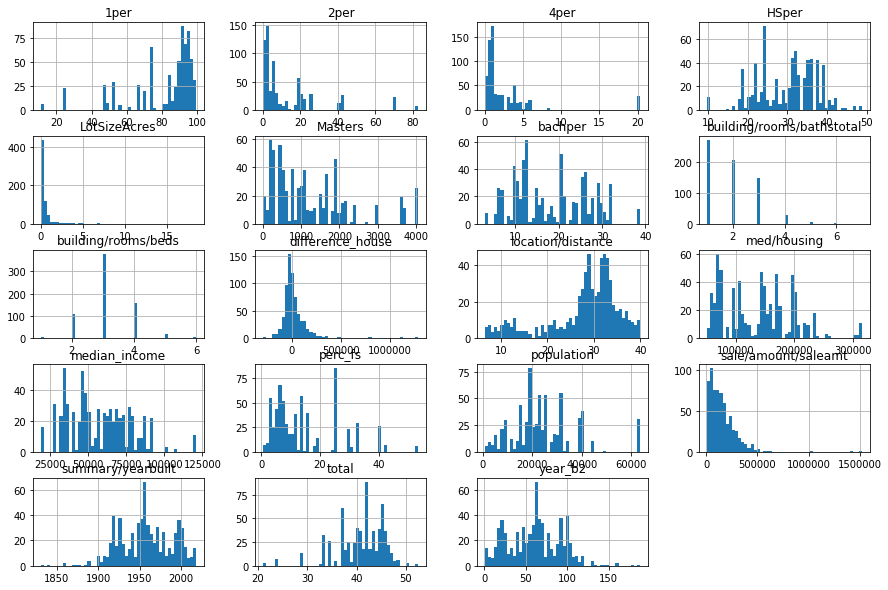

In [39]:
ML_df.hist(bins=50,figsize=(15,10))

In [40]:
corr_matrix=ML_df.corr()
corr_matrix['sale/amount/saleamt'].sort_values(ascending=False)

sale/amount/saleamt          1.000000
difference_house             0.906623
building/rooms/bathstotal    0.701279
med/housing                  0.587652
median_income                0.563129
bachper                      0.530621
summary/yearbuilt            0.518898
Masters                      0.430279
building/rooms/beds          0.397758
1per                         0.343848
total                        0.309742
LotSizeAcres                 0.177879
population                   0.095498
4per                        -0.033809
location/distance           -0.305558
2per                        -0.343133
HSper                       -0.463266
perc_fs                     -0.494378
year_b2                     -0.518898
Name: sale/amount/saleamt, dtype: float64

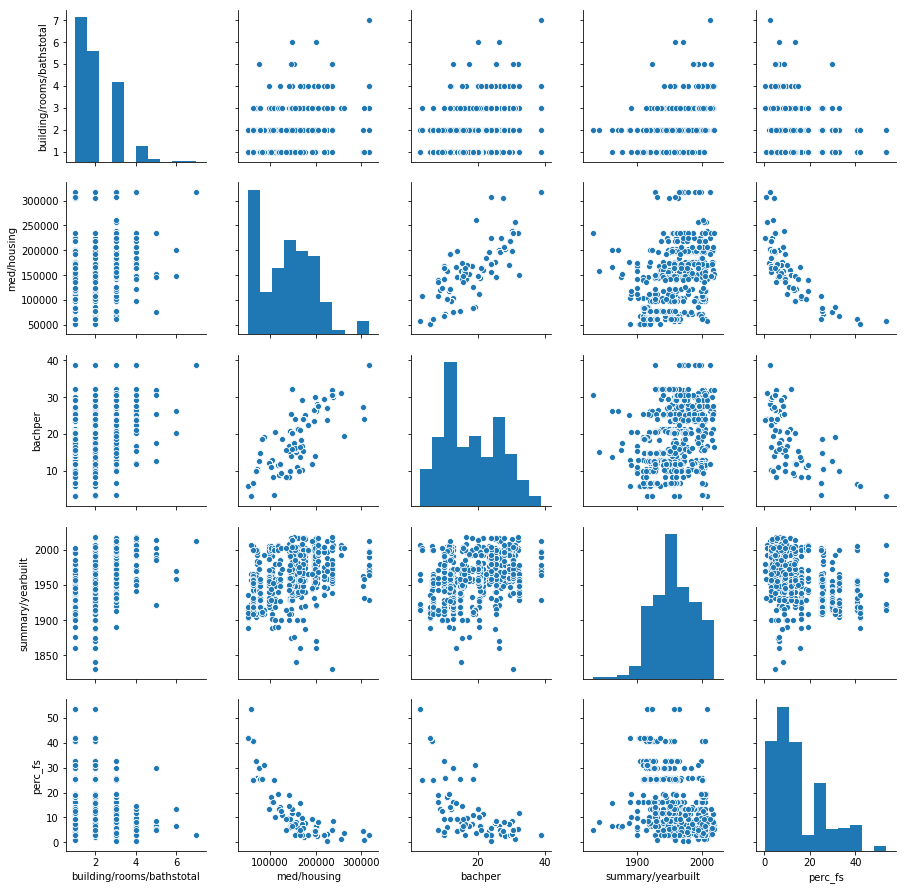

In [41]:
import seaborn as sns
sns.pairplot(ML_df[['building/rooms/bathstotal','med/housing','bachper','summary/yearbuilt', 'perc_fs']])

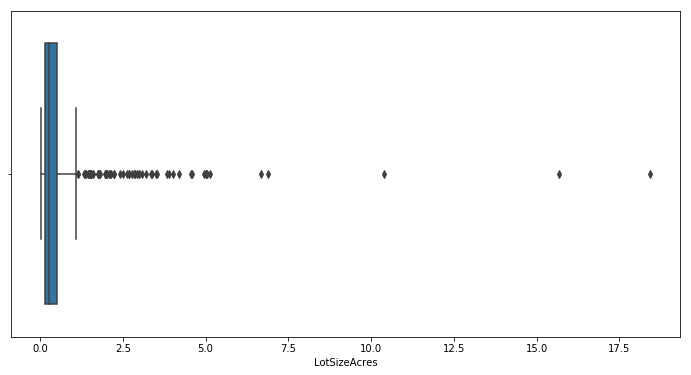

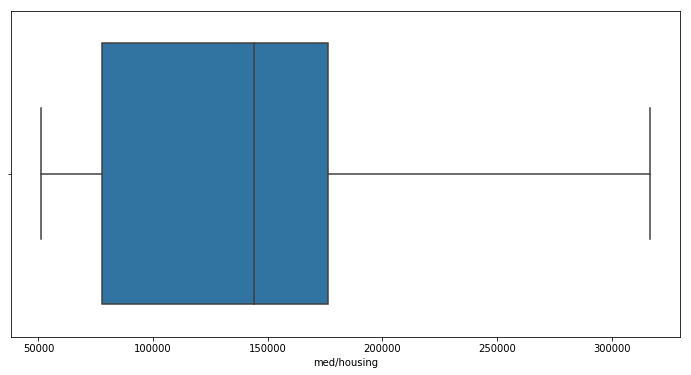

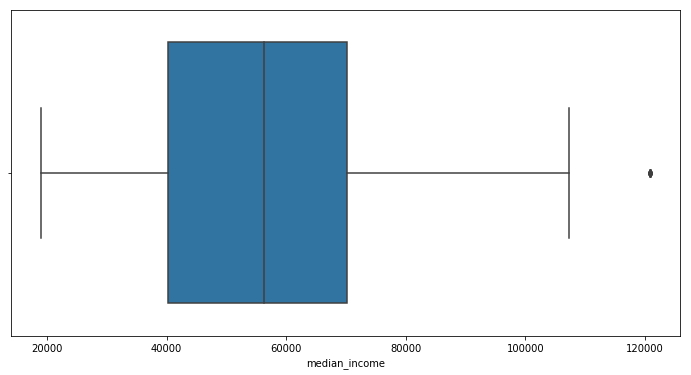

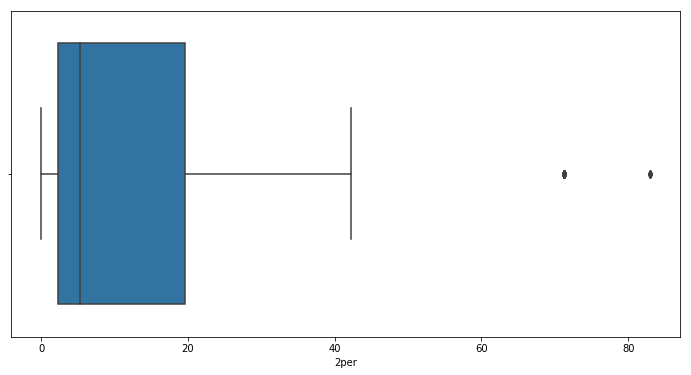

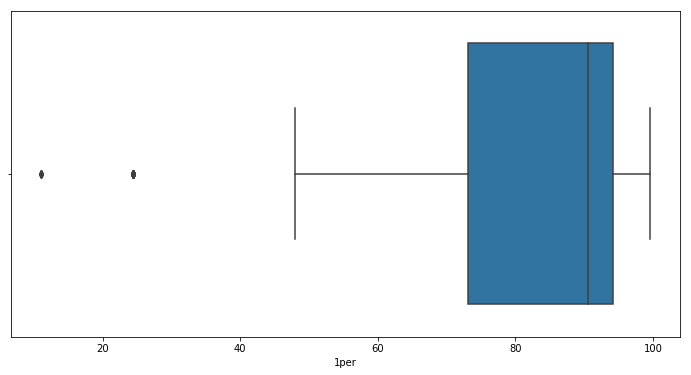

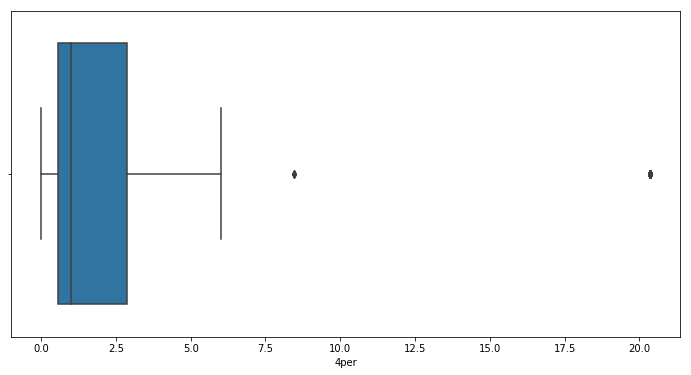

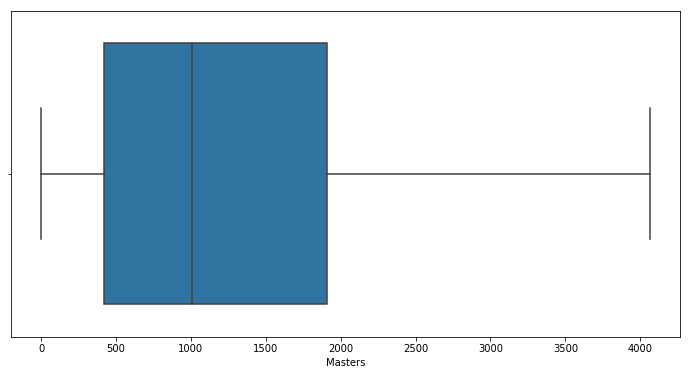

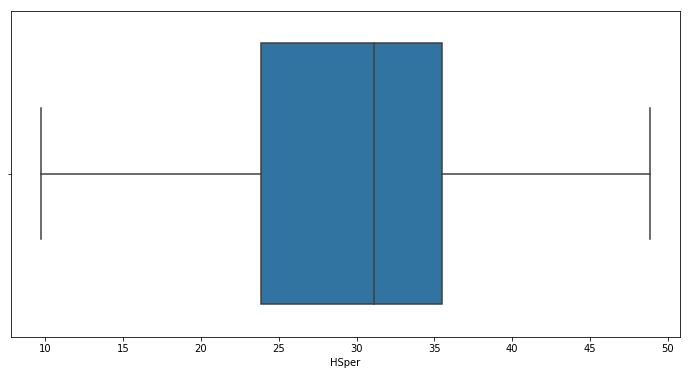

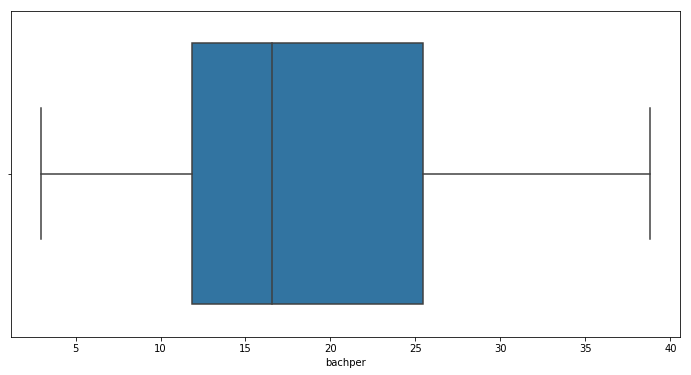

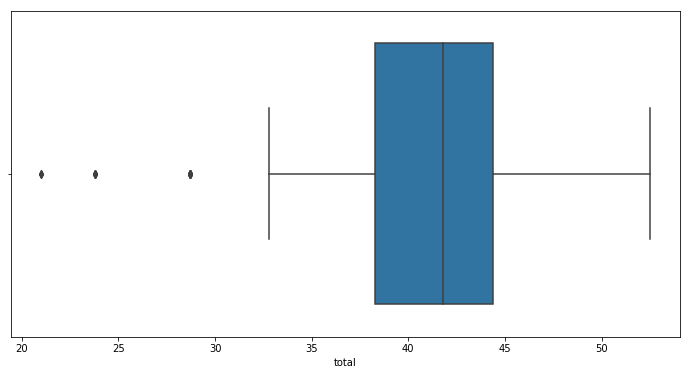

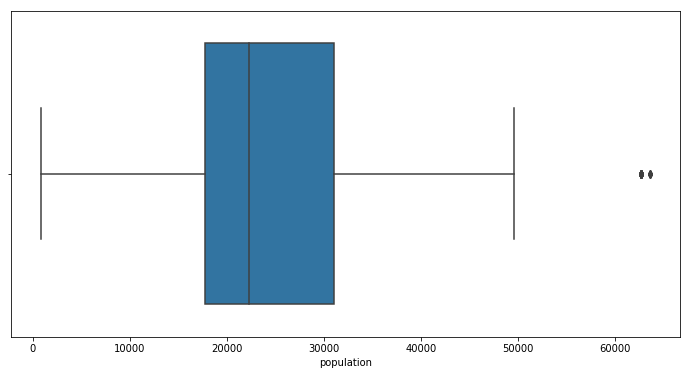

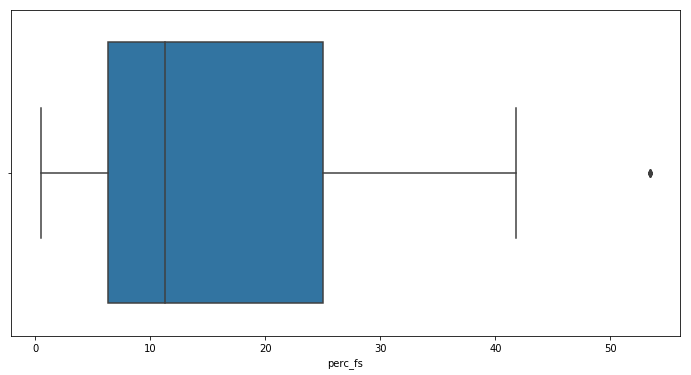

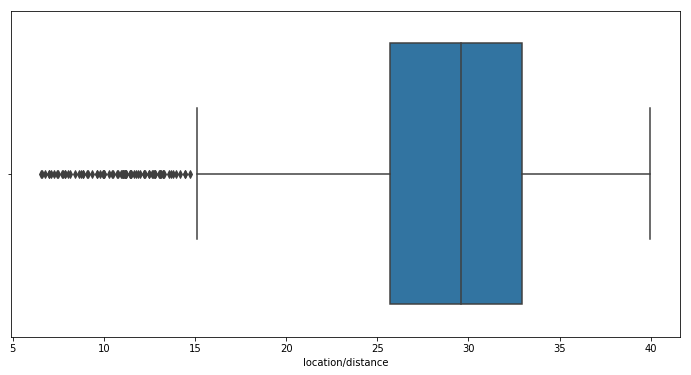

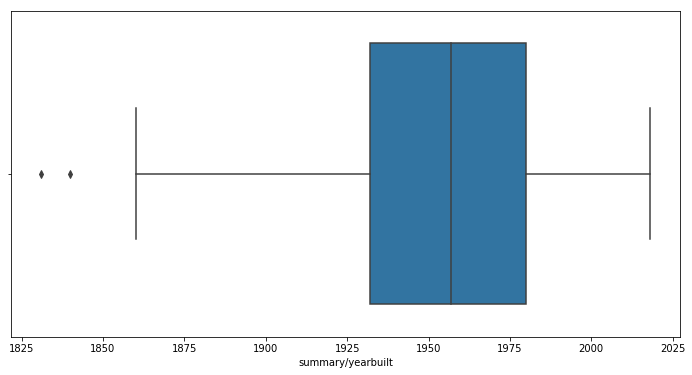

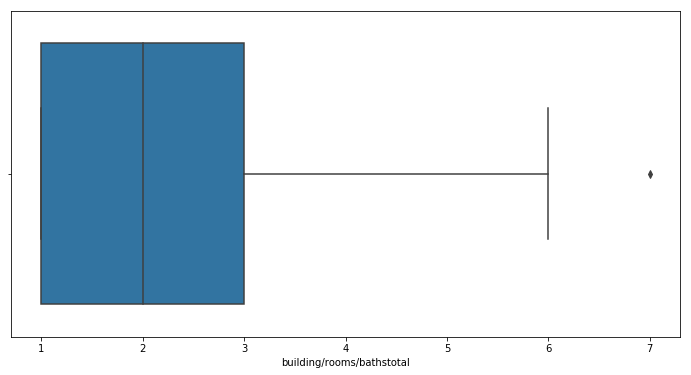

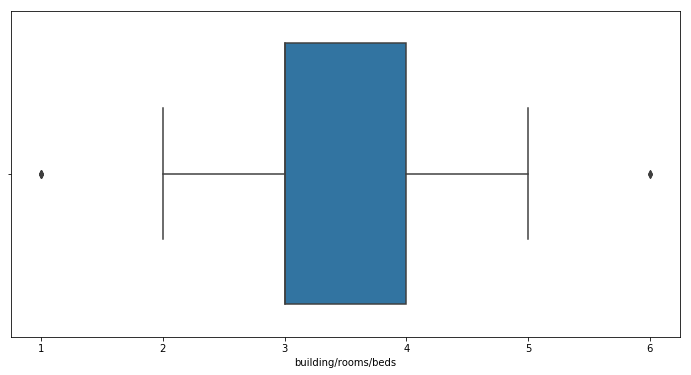

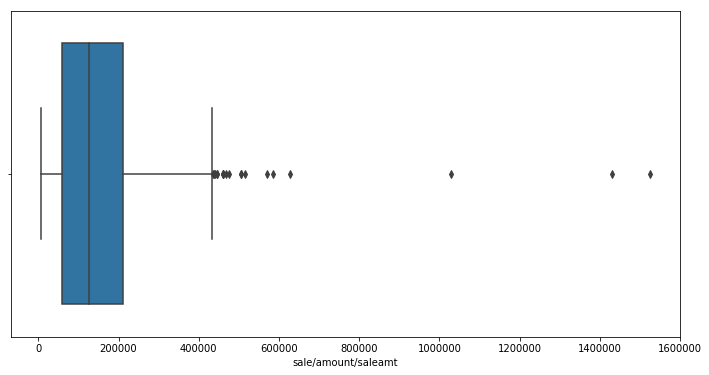

In [42]:

num_features=["LotSizeAcres", "med/housing", "median_income", "2per", "1per", "4per", "Masters", "HSper", "bachper", "total", "population", "perc_fs", "location/distance", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds", "sale/amount/saleamt"]
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=ML_df,ax=ax)

In [43]:
ML_df1=ML_df.copy()
skewness=[]
for i in num_features:
    skewness.append(ML_df1[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)


,skewness
LotSizeAcres,7.760354
sale/amount/saleamt,3.670290
4per,3.487398
2per,2.225042
Masters,1.169324
perc_fs,1.072443
population,1.013610
building/rooms/bathstotal,0.974481
med/housing,0.559996
median_income,0.505139


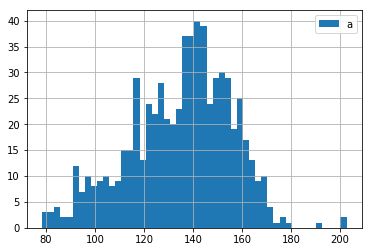

In [44]:
ML_df1['sale/amount/saleamt'].apply(lambda x: np.log1p(x)**2).hist(bins=50,label='a')
plt.legend()

In [45]:
def get_vif(X):
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return pd.Series(index=X.columns,data=l).sort_values(ascending=False)
            
        
def remove_by_vif(X,vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    for i in range(len(X.columns)):
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s=pd.Series(index=X.columns,data=l).sort_values(ascending=False)
        if s.iloc[0]>vif:
            X.drop(s.index[0],axis=1,inplace=True)
            print('Removed: ',s.index[0],', VIF: ',s.iloc[0])
        else:
            break

In [46]:
get_vif(ML_df1)

C:\Users\emhar\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


sale/amount/saleamt                  inf
med/housing                          inf
difference_house                     inf
summary/yearbuilt            9049.337532
1per                          392.734798
2per                          313.461315
median_income                  20.663661
year_b2                        18.444906
4per                           17.871617
perc_fs                        15.620455
Masters                        13.520104
bachper                        12.598086
HSper                           8.371444
population                      6.356870
total                           3.527924
building/rooms/bathstotal       2.530777
location/distance               1.998309
building/rooms/beds             1.390265
LotSizeAcres                    1.193201
dtype: float64

In [47]:
remove_by_vif(ML_df1)

Removed:  sale/amount/saleamt , VIF:  inf
Removed:  summary/yearbuilt , VIF:  9049.33753178857
Removed:  1per , VIF:  405.6791593063053
Removed:  total , VIF:  204.72922670900203
Removed:  median_income , VIF:  145.05056473338013
Removed:  HSper , VIF:  49.422578025477314
Removed:  bachper , VIF:  36.66619242777026
Removed:  building/rooms/beds , VIF:  23.99274019119412
Removed:  perc_fs , VIF:  20.082769114800037
Removed:  med/housing , VIF:  15.32614202376038
Removed:  location/distance , VIF:  10.315680033515756
Removed:  population , VIF:  8.309078126592107


In [48]:
X = ML_df[["LotSizeAcres", "location/distance", "med/housing", "perc_fs", "median_income", "bachper", "2per", "1per", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]
y = ML_df["sale/amount/saleamt"].values.reshape(-1, 1)
print(X.shape, y.shape)

(666, 11) (666, 1)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=81)

In [50]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [51]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\emhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\emhar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6501459546019972
Testing Score: 0.4969134692717447


In [609]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION
training_score = model.score(X_train_scaled, y_train_scaled)


print(f"Training Score: {training_score}")

print(f"MSE: {MSE}, testing: {r2}")

Training Score: 0.6480592819747699
MSE: 0.2685280727096388, testing: 0.6857329243525931


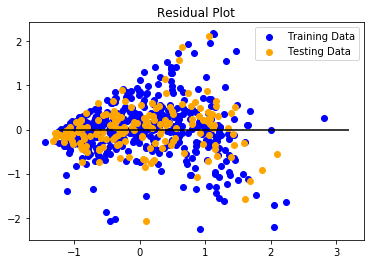

In [610]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [611]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2659908849438753, R2: 0.6887022771337343


In [612]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_scaled ,y_train_scaled)
model.best_params_


{'n_neighbors': 6}

In [602]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [603]:
training_score = neigh.score(X_train_scaled, y_train_scaled)
testing_score = neigh.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7232336465657137
Testing Score: 0.6437395679428677


In [545]:
MSE2 = mean_squared_error(y_test_scaled, neigh.predict(X_test_scaled))
print(MSE2)

0.29614826709000447


In [546]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 700, min_samples_split= 5, min_samples_leaf= 2, max_depth=20, random_state=6) 
  
# fit the regressor with x and y data 
regressor.fit(X_train_scaled, y_train_scaled.ravel())   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [550]:
training_score = regressor.score(X_train_scaled, y_train_scaled)
testing_score = regressor.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9046951284883801
Testing Score: 0.6513928885703641


In [551]:
data = X = ML_df[["LotSizeAcres", "med/housing", "perc_fs", "median_income", "bachper", "2per", "1per", "summary/yearbuilt", "building/rooms/bathstotal", "building/rooms/beds"]]

print(X.shape, y.shape)
feature_names = data.columns
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)

(663, 10) (663, 1)


[(0.510201835681468, 'building/rooms/beds'),
 (0.09916561260762079, 'median_income'),
 (0.07995431896040081, 'building/rooms/bathstotal'),
 (0.07907675448968311, 'LotSizeAcres'),
 (0.06476416354006917, 'med/housing'),
 (0.06208994033516041, 'perc_fs'),
 (0.028041790481314166, '2per'),
 (0.02639224138842384, 'bachper'),
 (0.01984248587511908, '1per'),
 (0.016405576829245976, 'summary/yearbuilt')]

In [549]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [316]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV]  n_estimators=266, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.5s


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1783, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   9.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1783, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   9.6s
[CV] n_estimators=1566, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   5.4s
[CV] n_estimators=1566, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators

[CV] n_estimators=1783, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1566, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   4.8s
[CV] n_estimators=1783, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1350, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.4s
[CV] n_estimators=1350, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1350, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   5.3s
[CV] n_estimators=1350, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1783, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   9.8s
[CV] n_estimators=

KeyboardInterrupt: 

In [57]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [405]:
#explore api options
import http.client 

conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "487ac4986deb86031b6d88f9505dfdc6", 
} 

ids="18471319108031"
conn.request("GET", "/propertyapi/v1.0.0/property/detail?id="+ ids, headers=headers) 

res = conn.getresponse() 
data = res.read() 

data1=data.decode("utf-8")
print(data1)

{"status":{"version":"1.0.0","code":0,"msg":"SuccessWithResult","total":1,"page":1,"pagesize":10},"property":[{"identifier":{"obPropId":18471319108031,"fips":"08031","apn":"0219204018000","apnOrig":"219204018000","attomId":184713191},"lot":{"depth":0,"frontage":0,"lotnum":"31","lotsize1":0.1077,"lotsize2":4690,"pooltype":"NONE"},"area":{"blockNum":"36","countrysecsubd":"Denver County","countyuse1":"113","muncode":"DE","munname":"DENVER","srvyRange":"68W","srvySection":"19","srvyTownship":"03S","subdname":"BERKELEY","subdtractnum":"0","taxcodearea":"0"},"address":{"country":"US","countrySubd":"CO","line1":"4529 WINONA CT","line2":"DENVER, CO 80212","locality":"Denver","matchCode":"ExaStr","oneLine":"4529 WINONA CT, DENVER, CO 80212","postal1":"80212","postal2":"2512","postal3":"C037"},"location":{"accuracy":"Street","elevation":0.0,"latitude":"39.778904","longitude":"-105.047624","distance":0.0,"geoid":"CO08031, CS0891007, DB0803360, MT30001324, ND0000119198, ND0000539537, PL0820000, SB

In [407]:
import numpy
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'tensorflow'

In [408]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define base model
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
# Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=2)

ModuleNotFoundError: No module named 'tensorflow'

In [409]:

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train_scaled, y_train_scaled, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

NameError: name 'KFold' is not defined